In [ ]:
"""
notebook: 1.2.-leibold-data-preprocessing_vehicles.jpynb

author: Christian Leibold

created/updated at: 2025-11-11

content:
---------
-> reads in joblib from prior process stept with csv-files for 2019-2024 vehicle data as base for this notebook 
-> check and remove duplicates (not occuring so far)
-> rename columns
-> remove completetly irrelevant variables 
        - veh_num: key column for merge is veh_id
        - veh_public_occupants: Number of occupants in public transport is not relevant as almost no frequency for trains, busses, etc. 
-> new: replace -1 with 0 values in categorical variables 
-> new: regroup classes in categorical variables by “business logic” to reduce cardinality
-> check missing values after -1 -> nan() replacement
-> check if value_counts() are fine and no corrupt values exist.
-> export to joblib data\processed\2_preprocessing\1.2-leibold-data-preprocessing_vehicles.joblib'

"""

In [61]:
import pandas as pd
import numpy as np
from joblib import dump, load
import seaborn as sns

In [62]:
df_veh = load(r'..\..\data\processed\1_exploration\1.1-leibold-data-exploration_vehicles.joblib')
df_veh.head(3)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,motor,id_vehicule
0,201900000001,2,7,NaN,0,2,5,23,B01,1,138 306 524
1,201900000001,2,17,NaN,1,0,3,11,A01,1,138 306 525
2,201900000002,1,7,NaN,4,0,1,0,A01,1,138 306 523


In [53]:
# --------------------------------------------------------------------------------------------------------------------------------
# check and drop duplicates
# --------------------------------------------------------------------------------------------------------------------------------
print("vehicles duplicates:", df_veh.duplicated().sum())

df_veh.drop_duplicates(inplace=True)

print("vehicles duplicates AFTER cleaning:", df_veh.duplicated().sum())



vehicles duplicates: 0
vehicles duplicates AFTER cleaning: 0


In [63]:
# --------------------------------------------------------------------------------------------------------------------------------
# rename columns
# --------------------------------------------------------------------------------------------------------------------------------
rename_map_vehicles = {
    'Num_Acc': 'acc_num',
    'senc': 'veh_traffic_direction',
    'catv': 'veh_cat',
    'occutc': 'veh_public_occupants',
    'obs': 'veh_fixed_obstacle',
    'obsm': 'veh_moving_obstacle',
    'choc': 'veh_impact',
    'manv': 'veh_maneuver',
    'num_veh': 'veh_num',
    'motor': 'veh_motor',
    'id_vehicule': 'veh_id'
}
df_veh.rename(columns=rename_map_vehicles, inplace=True)



In [64]:
# --------------------------------------------------------------------------------------------------------------------------------
# remove absolute irrelvant columns
# --------------------------------------------------------------------------------------------------------------------------------
df_veh.drop(['veh_public_occupants','veh_num'], axis=1, inplace=True)

df_veh.head(3)


,acc_num,veh_traffic_direction,veh_cat,veh_fixed_obstacle,veh_moving_obstacle,veh_impact,veh_maneuver,veh_motor,veh_id
0,201900000001,2,7,0,2,5,23,1,138 306 524
1,201900000001,2,17,1,0,3,11,1,138 306 525
2,201900000002,1,7,4,0,1,0,1,138 306 523


In [65]:
# --------------------------------------------------------------------------------------------------------------------------------
# replace -1 with nan() in categorical variables 
# --------------------------------------------------------------------------------------------------------------------------------
#df_veh['veh_traffic_direction'] = df_veh['veh_traffic_direction'].replace([-1,0], np.nan) # cat 0 has no info here
#df_veh['veh_cat'] = df_veh['veh_cat'].replace([-1], np.nan) # 0 kept as own category (not used anyway)
#df_veh['veh_fixed_obstacle'] = df_veh['veh_fixed_obstacle'].replace([-1], np.nan) # 0 kept as own category
#df_veh['veh_moving_obstacle'] = df_veh['veh_moving_obstacle'].replace([-1], np.nan) # 0 kept as own category
#df_veh['veh_impact'] = df_veh['veh_impact'].replace([-1], np.nan) # 0 kept as own category
#df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace([-1,0], np.nan) # cat 0 has no info here
#df_veh['veh_motor'] = df_veh['veh_motor'].replace([-1,0], np.nan) # cat 0 has no info here

# --------------------------------------------------------------------------------------------------------------------------------
# replace -1 to 0 values in categorical variables
# --------------------------------------------------------------------------------------------------------------------------------
df_veh['veh_traffic_direction'] = df_veh['veh_traffic_direction'].replace(-1, 0) 
df_veh['veh_cat'] = df_veh['veh_cat'].replace(-1, 0) 
df_veh['veh_fixed_obstacle'] = df_veh['veh_fixed_obstacle'].replace(-1, 0) 
df_veh['veh_moving_obstacle'] = df_veh['veh_moving_obstacle'].replace(-1, 0) 
df_veh['veh_impact'] = df_veh['veh_impact'].replace(-1, 0) 
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace(-1, 0) 
df_veh['veh_motor'] = df_veh['veh_motor'].replace(-1, 0) 



In [66]:
# --------------------------------------------------------------------------------------------------------------------------------
# regroup classes of categorical variables with high cardinality
# --------------------------------------------------------------------------------------------------------------------------------
# veh_cat
df_veh['veh_cat'] = df_veh['veh_cat'].replace(10, 7)  # 7-Light vehicle only, 10-Light vehicle only1.5T<= GVWR<= 3.5T => 7-Light Vehicle
df_veh['veh_cat'] = df_veh['veh_cat'].replace(80, 1)  # 1-Bicycle, 80-E-bike => 1-Bicycle/E-Bike
df_veh['veh_cat'] = df_veh['veh_cat'].replace([2,31], 33)  # 2-Moped<50cc, 31-Motorcycle>50ccand<=125cc, 33-Motorcycle>125cc => 33-Motorcycle/Moped
df_veh['veh_cat'] = df_veh['veh_cat'].replace([13,15], 14)  # 13-HGVonly3.5T<GVW<=7.5T, 14-HGVonly>7.5T, 15-HGV>3.5T+trailer => 14-Heavy goods vehicle
df_veh['veh_cat'] = df_veh['veh_cat'].replace([38,39,40], 37) # 37-Bus, 38-Coach, 39-Train, 40-Tram => 37-Public Transport
df_veh['veh_cat'] = df_veh['veh_cat'].replace([16,20,21], 17) # 16-Road tractor only , 20-Special engine vehicle , 21-Agricultural tractor => 17-Tractor
df_veh['veh_cat'] = df_veh['veh_cat'].replace(3, 99) # 3-Small car (quadricycle with bodied motor) (formerly "small car or motor tricycle")  => 99-Other Vehicle
df_veh['veh_cat'] = df_veh['veh_cat'].replace(60, 50) # 50-EDP with engine, 60-EDP without engine => 50-EDP
df_veh['veh_cat'] = df_veh['veh_cat'].replace([32,34,35,36,41,42,43], 30)  # 30-Scooter<50cc, 32-Scooter>50ccand<=125cc, 34-Scooter>125cc, 35-Lightquad<=50cc, 36-Heavyquad>50cc 
                                                                                               # 41-3WD<=50cc ,42-3WD>50cc<=125cc ,43-3WD>125cc50EDPwithengine  => 30-Scooter/3WD/Quad 

# veh_fixed_obstacle
df_veh['veh_fixed_obstacle'] = df_veh['veh_fixed_obstacle'].replace(3, 4) # 3-Metal barrier , 4-Concrete barrier , => 4 - Concrete / Metal Barrier
df_veh['veh_fixed_obstacle'] = df_veh['veh_fixed_obstacle'].replace([7,9,10,11,12,14,15,16], 5) # low frequencies => 5-Other barrier

# veh_moving_obstacle
df_veh['veh_moving_obstacle'] = df_veh['veh_moving_obstacle'].replace([4,5,6], 9) # low frequencies => 9-Other

# veh_maneuver
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace(12, 11) # 11-Changing lanes Left, 12-Changing lanes Right, => 11 - Changing lanes left/right 
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace(14, 13) # 13-Offset Left, 14- Offset Right => 13 - Offset left/right
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace(16, 15) # 15-Turning Left , 16-Turning Right , => 15 - Turning left/right
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace(18, 17) # 17-Overtaking Left , 18-Overtaking Right  => 17 - Overtaking left/right
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace([4,10,20,22,24], 98) # other low frequency variables with low mean on target => 98 - Others less severe
df_veh['veh_maneuver'] = df_veh['veh_maneuver'].replace([3,6,7,8,21,25], 99) # other low frequency variables with low mean on target => 99 - Others highly severe



10
             Count  Proportion
veh_impact                    
1           202416    0.361556
3            82962    0.148187
2            67920    0.121319
4            54911    0.098082
8            38837    0.069371
0            36188    0.064639
7            33181    0.059268
6            19696    0.035181
5            15857    0.028324
9             7879    0.014073


<Axes: xlabel='veh_impact', ylabel='count'>

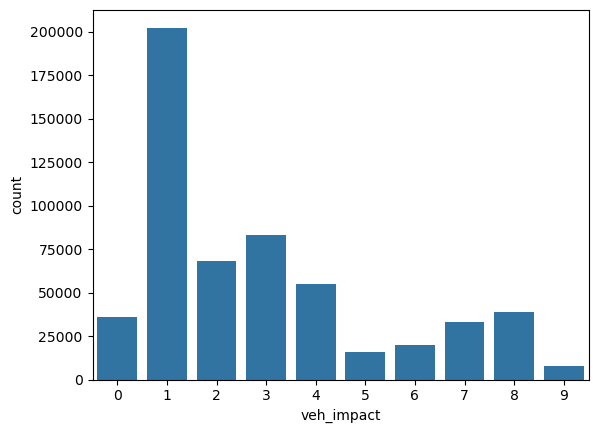

In [67]:
print(df_veh['veh_impact'].nunique())

result = pd.DataFrame({
    'Count': df_veh['veh_impact'].value_counts(),
    'Proportion': df_veh['veh_impact'].value_counts(normalize=True)
})

print(result)

sns.countplot(x='veh_impact', data=df_veh)



In [68]:
# --------------------------------------------------------------------------------------------------------------------------------
# check missing values after replacement of -1/0 catagories
# --------------------------------------------------------------------------------------------------------------------------------
missing_counts = df_veh.isna().sum()
missing_percent = df_veh.isna().sum() / len(df_veh)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(4)
})

print(missing_summary)

                       Missing Count  Missing %
acc_num                            0        0.0
veh_traffic_direction              0        0.0
veh_cat                            0        0.0
veh_fixed_obstacle                 0        0.0
veh_moving_obstacle                0        0.0
veh_impact                         0        0.0
veh_maneuver                       0        0.0
veh_motor                          0        0.0
veh_id                             0        0.0


In [69]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559847 entries, 0 to 559846
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   acc_num                559847 non-null  int64 
 1   veh_traffic_direction  559847 non-null  int64 
 2   veh_cat                559847 non-null  int64 
 3   veh_fixed_obstacle     559847 non-null  int64 
 4   veh_moving_obstacle    559847 non-null  int64 
 5   veh_impact             559847 non-null  int64 
 6   veh_maneuver           559847 non-null  int64 
 7   veh_motor              559847 non-null  int64 
 8   veh_id                 559847 non-null  object
dtypes: int64(8), object(1)
memory usage: 38.4+ MB


In [70]:
# --------------------------------------------------------------------------------------------------------------------------------
# check all unique values
# --------------------------------------------------------------------------------------------------------------------------------
excluded_cols = ['acc_num', 'veh_id']

for col in [c for c in df_veh.columns if c not in excluded_cols]:
    print(f"\nValue counts for '{col}':")
    print(df_veh[col].value_counts(dropna=False))


Value counts for 'veh_traffic_direction':
veh_traffic_direction
1    250918
2    190014
3     83120
0     35795
Name: count, dtype: int64

Value counts for 'veh_cat':
veh_cat
7     368852
33     75431
30     38510
1      34453
14     11921
50     11637
17      6023
37      5765
99      5662
0       1593
Name: count, dtype: int64

Value counts for 'veh_fixed_obstacle':
veh_fixed_obstacle
0     477987
5      21354
4      15267
1      13214
13      9915
2       8523
8       6552
6       6428
17       607
Name: count, dtype: int64

Value counts for 'veh_moving_obstacle':
veh_moving_obstacle
2    391713
0    104588
1     52082
9     11464
Name: count, dtype: int64

Value counts for 'veh_impact':
veh_impact
1    202416
3     82962
2     67920
4     54911
8     38837
0     36188
7     33181
6     19696
5     15857
9      7879
Name: count, dtype: int64

Value counts for 'veh_maneuver':
veh_maneuver
1     228744
2      64289
15     59874
0      35808
13     35707
17     21416
99     18792
26  

In [71]:
# -------------------------------------------------------------------------------------------------
# export final dataframe to joblib
# -------------------------------------------------------------------------------------------------
from joblib import dump

dump(df_veh, (r'..\..\data\processed\2_preprocessing\1.2-leibold-data-preprocessing_vehicles.joblib'))

['..\\..\\data\\processed\\2_preprocessing\\1.2-leibold-data-preprocessing_vehicles.joblib']